In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/test.csv
/kaggle/input/nlp-getting-started/train.csv


In [2]:
df=pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')


In [3]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
df['keyword'].isnull().sum()

61

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
import re

In [8]:

for item in df[df['target']==1]['text'].sample(5):
    
    print(item)

There's an emergency evacuation happening now in the building across the street
Cop pulls drunk driver to safety SECONDS before his car is hit by train. http://t.co/tHrhKHOGcUåÊ http://t.co/tZSZmF2qxE via @ViralSpell
?? New Ladies Shoulder Tote #Handbag Faux Leather Hobo Purse Cross Body Bag #Womens http://t.co/zujwUiomb3 http://t.co/iap4LwvqsW
Inbounds/ Out of Bounds:

While many picked the Nats to win the NL East in a landslide they currently sit 2... http://t.co/l0dEoCxU6o
Bloody insomnia again! Grrrr!! #Insomnia


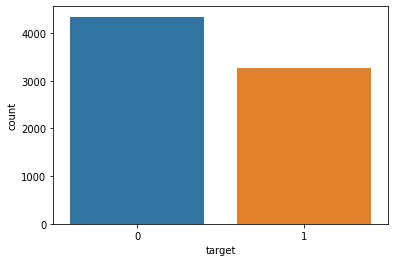

In [9]:
sns.countplot(df['target'])

In [10]:
pattern=r'http.?:\/\/[a-z0-9A-Z\.]+\/[a-z0-9A-Z]+'
def clean(text):
    return re.sub(pattern,'',text)
df['text1']=df['text'].apply(clean)
    
    
    
    

In [11]:
for item in df[df['target']==0]['text1'].sample(5):
    
    print(item)

'If you looking for my niggas you can follow the sirens.' ????
Save your riches in heaven where they will never decrease because no thief can gets them and no moth can destroy them. ??
beautiful disaster 
I sent my emails why are the TRINNA hold me hostage  rapping me up ??
Ahrar Al Sham: In our negotiations with Iran over Al Zabadani they wanted all Sunnis evacuated out of Al Zabadani!


In [12]:
df['text1'][1390]

'Ted Cruz fires back at Jeb &amp; Bush: \x89ÛÏWe lose because of Republicans like Jeb &amp; Mitt.\x89Û\x9d [Video] -  '

In [13]:
df['length_text']=df['text1'].apply(len)

In [14]:
df.head()

,id,keyword,location,text,target,text1,length_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake M...,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or...",65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as ...,88


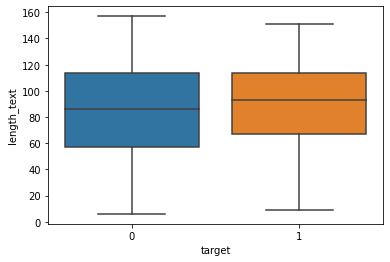

In [15]:
sns.boxplot(x='target',y='length_text',data=df)

In [16]:
import spacy
import nltk

In [17]:
sp = spacy.load('en_core_web_sm')

all_stopwords = sp.Defaults.stop_words

In [20]:
def remove_stop(st):
    newst=[item for item in st.split() if item not in all_stopwords]
    return ' '.join(newst)
df['text2']=df['text1'].apply(remove_stop)
    

In [21]:
df['length_text']=df['text2'].apply(len)

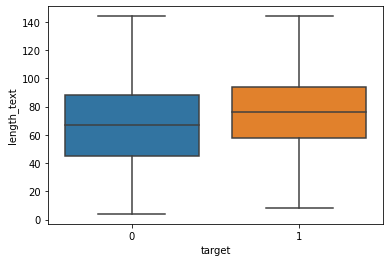

In [22]:
sns.boxplot(x='target',y='length_text',data=df)

In [23]:
df.head()

,id,keyword,location,text,target,text1,length_text,text2
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake M...,46,Our Deeds Reason #earthquake May ALLAH Forgive
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada,38,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...,98,All residents asked 'shelter place' notified o...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or...",61,"13,000 people receive #wildfires evacuation or..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as ...,62,Just got sent photo Ruby #Alaska smoke #wildfi...


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer()
train_vec=vect.fit_transform(df['text1'])

In [25]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [26]:
from sklearn.model_selection import cross_val_score
scores =cross_val_score(lr, train_vec, df["target"], cv=10, scoring="accuracy")
scores.mean()

0.7219230809026664

In [27]:
test_df=pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')


In [28]:
test_df['text1']=test_df['text'].apply(clean)

In [29]:
test_vec=vect.transform(test_df['text1'])

In [30]:
lr.fit(train_vec,df['target'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
p=lr.predict(test_vec)

In [32]:
sample_submission = pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")

In [33]:
sample_submission['target']=p

In [34]:
sample_submission.to_csv("submission.csv", index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
